Accuracy: 1.0
              precision    recall  f1-score   support

      comedy       1.00      1.00      1.00         1
 documentary       1.00      1.00      1.00         1
       drama       1.00      1.00      1.00         2
    thriller       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

              precision  recall  f1-score  support
comedy              1.0     1.0       1.0      1.0
documentary         1.0     1.0       1.0      1.0
drama               1.0     1.0       1.0      2.0
thriller            1.0     1.0       1.0      1.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0      5.0
weighted avg        1.0     1.0       1.0      5.0


C:\Users\harin\AppData\Local\Temp\ipykernel_17884\4133956167.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df['GENRE'], palette="viridis")


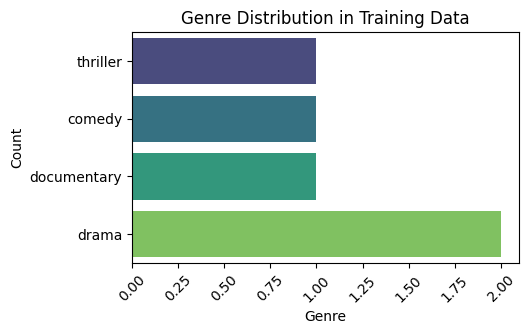

C:\Users\harin\AppData\Local\Temp\ipykernel_17884\4133956167.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=predictions, palette="viridis")


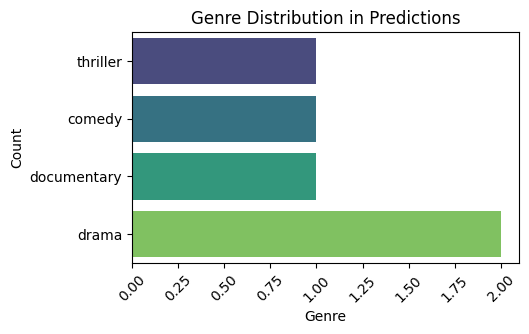

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data loading
train_data = [
    {"ID": 1, "TITLE": "Edgar's Lunch (1998)", "GENRE": "thriller", "DESCRIPTION": "L.R. Brane loves his life..."},
    {"ID": 2, "TITLE": "La guerra de papá (1977)", "GENRE": "comedy", "DESCRIPTION": "Spain, March 1964..."},
    {"ID": 3, "TITLE": "Off the Beaten Track (2010)", "GENRE": "documentary", "DESCRIPTION": "One year in the life of Albin..."},
    {"ID": 4, "TITLE": "Meu Amigo Hindu (2015)", "GENRE": "drama", "DESCRIPTION": "His father has died..."},
    {"ID": 5, "TITLE": "Er nu zhai (1955)", "GENRE": "drama", "DESCRIPTION": "Before he was known internationally..."}
]

test_data = [
    {"ID": 1, "TITLE": "Edgar's Lunch (1998)", "DESCRIPTION": "L.R. Brane loves his life..."},
    {"ID": 2, "TITLE": "La guerra de papá (1977)", "DESCRIPTION": "Spain, March 1964..."},
    {"ID": 3, "TITLE": "Off the Beaten Track (2010)", "DESCRIPTION": "One year in the life of Albin..."},
    {"ID": 4, "TITLE": "Meu Amigo Hindu (2015)", "DESCRIPTION": "His father has died..."},
    {"ID": 5, "TITLE": "Er nu zhai (1955)", "DESCRIPTION": "Before he was known internationally..."}
]

# Convert to DataFrame
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# Combine title and description for feature extraction
train_df['TEXT'] = train_df['TITLE'] + " " + train_df['DESCRIPTION']
test_df['TEXT'] = test_df['TITLE'] + " " + test_df['DESCRIPTION']

# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_df['TEXT'])
y_train = train_df['GENRE']

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Vectorize test data
X_test = vectorizer.transform(test_df['TEXT'])

# Predict genres for test data
predictions = model.predict(X_test)

# Since test data does not have true labels, use train data for evaluation
# This part is just for demonstration and should be replaced with actual test data labels
y_true = y_train[:X_test.shape[0]]  # Use X_test.shape[0] to get the number of test samples
accuracy = accuracy_score(y_true, predictions)
print(f'Accuracy: {accuracy}')

# Generate classification report
report = classification_report(y_true, predictions, output_dict=True)
print(classification_report(y_true, predictions))

# Convert report to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Plot genre distribution in training data
plt.figure(figsize=(5, 3))
sns.countplot(y=train_df['GENRE'], palette="viridis")
plt.title('Genre Distribution in Training Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot genre distribution in predictions
plt.figure(figsize=(5, 3))
sns.countplot(y=predictions, palette="viridis")
plt.title('Genre Distribution in Predictions')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()